# 2017 Open Data Day Hackathon at Mobile Web Ghana

### Open Tender Contracts Awarded by Ministry of Health 

After investigating the dataset for this small project, I realised that the data wasn't scraped well. The dataset has many empty rows. This limited the scope of the project as it cannot answer all questions I have concerning the dataset.

However, for demonstration of data visualisation, I went ahead to work with the dataset.

In [1]:
import csv
# open and read in the file
f = open("Health_Sector_Contracts.csv", 'r')
raw_data = list(csv.reader(f))
raw_data = raw_data[1:]

### A snapshot of the dataset

In [4]:
raw_data[:3]

[['PROCUREMENT OF NON-MEDICINE CONSUMABLES',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'SIR JOE ENTERPRISE',
  '9/30/2016',
  '12/30/2016',
  'GH¢475,050.00',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Procurement of Non-Essential Medicines - Various',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'BELSHAW LTD',
  '9/30/2016',
  '12/30/2016',
  'GH¢349,210.00',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['PROCUREMENT OF NON-MEDICINE CONSUMABLES',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'STANBRAVO COMPANY LTD',
  '9/30/2016',
  '12/30/2016',
  'GH¢47,000.00',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '']]

### Empty fields need to be taken out of the dataset to make it clean

In [5]:
# data in file not clean make a new object for cleaned data
contracts = []

for data in raw_data:
    contracts.append((data[:6]))

### After empty fields taken out

In [6]:
contracts[:3]

[['PROCUREMENT OF NON-MEDICINE CONSUMABLES',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'SIR JOE ENTERPRISE',
  '9/30/2016',
  '12/30/2016',
  'GH¢475,050.00'],
 ['Procurement of Non-Essential Medicines - Various',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'BELSHAW LTD',
  '9/30/2016',
  '12/30/2016',
  'GH¢349,210.00'],
 ['PROCUREMENT OF NON-MEDICINE CONSUMABLES',
  'Regional Health Directorate - Ashanti Region/Ministry of Health',
  'STANBRAVO COMPANY LTD',
  '9/30/2016',
  '12/30/2016',
  'GH¢47,000.00']]

In [7]:
import pandas as pd

In [8]:
fields = ['Tender Description', 'Awarding Agency/Ministry', 'Contract Awarded To', 'Contract Signed on', 'Estimated Contract Completion Date', 'Contract Award Price']
contracts = pd.DataFrame(contracts, columns=fields)

### The first 5 rows of the dataset

In [9]:
contracts.head()

,Tender Description,Awarding Agency/Ministry,Contract Awarded To,Contract Signed on,Estimated Contract Completion Date,Contract Award Price
0,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,SIR JOE ENTERPRISE,9/30/2016,12/30/2016,"GH¢475,050.00"
1,Procurement of Non-Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,BELSHAW LTD,9/30/2016,12/30/2016,"GH¢349,210.00"
2,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,STANBRAVO COMPANY LTD,9/30/2016,12/30/2016,"GH¢47,000.00"
3,Procurement of Non-Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,ALPHA INNOVATIONS,9/30/2016,12/30/2016,"GH¢758,000.00\n"
4,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,INVESTREADE INTERNATIONAL COMPANY LTD,9/30/2016,12/30/2016,"GH¢1,552,100.00"


### Further clean up

I will work with the amount that was involved in each contract. Hence, the amount must be of type that will make doing math with it possible. To begin with, I would have to strip of all the "GH¢" that precedes the amount in each awarded contact.

In [10]:
contracts['Contract Award Price'] = contracts['Contract Award Price'].str.replace("GH¢", "").str.replace(",", "").str.replace("\n", "").str.rstrip()

In [11]:
pd.options.display.float_format = '{:20,.2f}'.format

In [12]:
contracts['Contract Award Price'] = pd.to_numeric(contracts['Contract Award Price'])

In [13]:
contracts.head()

,Tender Description,Awarding Agency/Ministry,Contract Awarded To,Contract Signed on,Estimated Contract Completion Date,Contract Award Price
0,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,SIR JOE ENTERPRISE,9/30/2016,12/30/2016,"475,050.00"
1,Procurement of Non-Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,BELSHAW LTD,9/30/2016,12/30/2016,"349,210.00"
2,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,STANBRAVO COMPANY LTD,9/30/2016,12/30/2016,"47,000.00"
3,Procurement of Non-Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,ALPHA INNOVATIONS,9/30/2016,12/30/2016,"758,000.00"
4,PROCUREMENT OF NON-MEDICINE CONSUMABLES,Regional Health Directorate - Ashanti Region/M...,INVESTREADE INTERNATIONAL COMPANY LTD,9/30/2016,12/30/2016,"1,552,100.00"


### Inconsistent company name in "Contract Awarded To" column.

In [14]:
contracts[contracts['Contract Awarded To'].str.contains("ERNEST CHEMIST")]

,Tender Description,Awarding Agency/Ministry,Contract Awarded To,Contract Signed on,Estimated Contract Completion Date,Contract Award Price
15,Procurement of Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,ERNEST CHEMISTS LTD,9/30/2016,12/30/2016,"487,490.00"
29,Supply of Medicines and Consumables,Akuse Government Hospital/Ministry of Health,ERNEST CHEMIST LTD,6/15/2015,9/15/2015,"209,927.71"
40,Non-Medicine Consumable - Various,Ketu South Municipal Hospital/Ministry of Health,ERNEST CHEMIST,1/28/2015,6/28/2015,"2,500.00"
98,Supply of Essential Medicines - Various,Northern Regional Health Directorate/Ministry ...,ERNEST CHEMIST LIMITED,6/15/2016,5/30/2017,"363,780.00"


From the above, we will realise that the company name "Ernest Chemist" in the "Contract Awarded To" column isn't consistent. It's in different virations. This will break our analysis as for example, if we wanted to see the unique companies that have been awared with contracts. "ERNEST CHEMISTS LTD", "ERNEST CHEMIST LTD", "ERNEST CHEMIST", "ERNEST CHEMIST LIMITED" will be seen as 4 different companies by the code.

Hence, there is a strong need to make then consistent.

In [15]:
contracts.loc[contracts['Contract Awarded To'].str.contains("ERNEST CHEMIST"), 'Contract Awarded To'] ='ERNEST CHEMIST LTD'

In [16]:
contracts[contracts['Contract Awarded To'].str.contains("ERNEST CHEMIST")]

,Tender Description,Awarding Agency/Ministry,Contract Awarded To,Contract Signed on,Estimated Contract Completion Date,Contract Award Price
15,Procurement of Essential Medicines - Various,Regional Health Directorate - Ashanti Region/M...,ERNEST CHEMIST LTD,9/30/2016,12/30/2016,"487,490.00"
29,Supply of Medicines and Consumables,Akuse Government Hospital/Ministry of Health,ERNEST CHEMIST LTD,6/15/2015,9/15/2015,"209,927.71"
40,Non-Medicine Consumable - Various,Ketu South Municipal Hospital/Ministry of Health,ERNEST CHEMIST LTD,1/28/2015,6/28/2015,"2,500.00"
98,Supply of Essential Medicines - Various,Northern Regional Health Directorate/Ministry ...,ERNEST CHEMIST LTD,6/15/2016,5/30/2017,"363,780.00"


### Replace "LIMITED" with "LTD" - A way to check against redundancy

In [17]:
contracts.loc[contracts['Contract Awarded To'].str.contains("LIMITED"), 'Contract Awarded To'] = contracts.loc[contracts['Contract Awarded To'].str.contains("LIMITED"), 'Contract Awarded To'].str.replace('LIMITED', 'LTD')

### Make a dictionary of companies that got two or more contracts

In [18]:
contract_frequency = {}
for company in contracts['Contract Awarded To']:
    if company and company not in contract_frequency:
        contract_frequency[company] = 1
    elif company and company in contract_frequency:
        contract_frequency[company] += 1

In [19]:
more_than_once_contracts = {}
for key, value in contract_frequency.items():
    if value > 1:
        more_than_once_contracts[key] = value

In [20]:
more_than_once_contracts

{'ALPHA INNOVATIONS': 2,
 'BELSHAW LTD': 2,
 'ERNEST CHEMIST LTD': 4,
 'FRANDAK AGENCY': 2,
 'INTRAVENOUS INFUSIONS LTD': 2,
 'PALB PHARMACEUTICALS LTD': 2,
 'PHARMANOVA LTD': 3,
 'SPINTEX CHEMIST LTD': 2,
 'SUPRA PHARMA LTD': 2,
 'TOBINCO PHARMACEUTICALS LTD': 2}

### Make a DataFrame of the companies that got two or more contracts

In [21]:
more_than_once = []
for key, value in more_than_once_contracts.items():
    temp = [key.title(),value]
    more_than_once.append(temp) 

In [22]:
more_than_once

[['Belshaw Ltd', 2],
 ['Alpha Innovations', 2],
 ['Supra Pharma Ltd', 2],
 ['Pharmanova Ltd', 3],
 ['Spintex Chemist Ltd', 2],
 ['Tobinco Pharmaceuticals Ltd', 2],
 ['Ernest Chemist Ltd', 4],
 ['Intravenous Infusions Ltd', 2],
 ['Palb Pharmaceuticals Ltd', 2],
 ['Frandak Agency', 2]]

In [23]:
fields = ['Company', 'Contract Frequency']
more_than_once_freq = pd.DataFrame(more_than_once, columns=fields)

### Final DataFrame

In [24]:
more_than_once_freq.head(n=11)

,Company,Contract Frequency
0,Belshaw Ltd,2
1,Alpha Innovations,2
2,Supra Pharma Ltd,2
3,Pharmanova Ltd,3
4,Spintex Chemist Ltd,2
5,Tobinco Pharmaceuticals Ltd,2
6,Ernest Chemist Ltd,4
7,Intravenous Infusions Ltd,2
8,Palb Pharmaceuticals Ltd,2
9,Frandak Agency,2


### What is the total amount of contracts awarded to the above companies?

In [25]:
tot_amt_more_than_once_contracts = {}
for company in more_than_once_contracts:
    total_contract_price = contracts[contracts['Contract Awarded To'] == company]['Contract Award Price'].sum()
    tot_amt_more_than_once_contracts[company] = round(total_contract_price, 2)

In [26]:
tot_amt_more_than_once_contracts

{'ALPHA INNOVATIONS': 1837140.0,
 'BELSHAW LTD': 519210.0,
 'ERNEST CHEMIST LTD': 1063697.71,
 'FRANDAK AGENCY': 24834470.0,
 'INTRAVENOUS INFUSIONS LTD': 1515425.0,
 'PALB PHARMACEUTICALS LTD': 1213700.0,
 'PHARMANOVA LTD': 2908822.07,
 'SPINTEX CHEMIST LTD': 1361100.0,
 'SUPRA PHARMA LTD': 279918.0,
 'TOBINCO PHARMACEUTICALS LTD': 423500.0}

### Make a DataFrame from the above dictionary

In [27]:
total_price_more_than_once = []
for key, value in tot_amt_more_than_once_contracts.items():
    temp = [key.title(),value]
    total_price_more_than_once.append(temp)

In [28]:
total_price_more_than_once

[['Belshaw Ltd', 519210.0],
 ['Alpha Innovations', 1837140.0],
 ['Supra Pharma Ltd', 279918.0],
 ['Pharmanova Ltd', 2908822.07],
 ['Spintex Chemist Ltd', 1361100.0],
 ['Tobinco Pharmaceuticals Ltd', 423500.0],
 ['Ernest Chemist Ltd', 1063697.71],
 ['Intravenous Infusions Ltd', 1515425.0],
 ['Palb Pharmaceuticals Ltd', 1213700.0],
 ['Frandak Agency', 24834470.0]]

In [29]:
fields = ['Company', 'Total Contract Price']
more_once_contracts_amt_totals = pd.DataFrame(total_price_more_than_once, columns=fields)

In [30]:
more_once_contracts_amt_totals.head()

,Company,Total Contract Price
0,Belshaw Ltd,"519,210.00"
1,Alpha Innovations,"1,837,140.00"
2,Supra Pharma Ltd,"279,918.00"
3,Pharmanova Ltd,"2,908,822.07"
4,Spintex Chemist Ltd,"1,361,100.00"


### Consolidate the DataFrames 

In [31]:
more_than_once_freq['Total Contract Price'] = more_once_contracts_amt_totals['Total Contract Price']

In [32]:
more_than_once_freq.head(n=11)

,Company,Contract Frequency,Total Contract Price
0,Belshaw Ltd,2,"519,210.00"
1,Alpha Innovations,2,"1,837,140.00"
2,Supra Pharma Ltd,2,"279,918.00"
3,Pharmanova Ltd,3,"2,908,822.07"
4,Spintex Chemist Ltd,2,"1,361,100.00"
5,Tobinco Pharmaceuticals Ltd,2,"423,500.00"
6,Ernest Chemist Ltd,4,"1,063,697.71"
7,Intravenous Infusions Ltd,2,"1,515,425.00"
8,Palb Pharmaceuticals Ltd,2,"1,213,700.00"
9,Frandak Agency,2,"24,834,470.00"


### CAUTION:
Dataset provided during the hackathon had over 800 missing rows. Hence, the analysis in this small project is for demonstration purposes. It will be very misleading to use the analysis here in any way part from demonstration.

### Quick visualization of the above DataFrame

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
company = more_than_once_freq.pop('Company')
more_than_once_freq.index = company

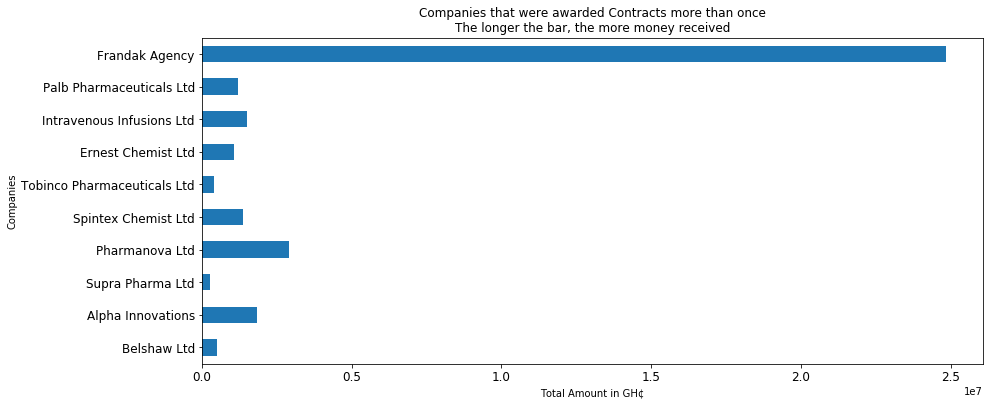

In [36]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

more_than_once_freq['Total Contract Price'].plot(kind='barh', figsize=(14,6), sort_columns=True, fontsize=12)
plt.xlabel("Total Amount in GH¢")
plt.ylabel("Companies")
plt.title("Companies that were awarded Contracts more than once\nThe longer the bar, the more money received")
plt.show()